Maximum Daily Total: 5.39 inches
Day with Maximum Precipitation: 2010-03-14
Maximum 24-hour Total: 5.51 inches

Period with Maximum 24-hour Precipitation:
Start: 2010-03-13 22:29:00
End: 2010-03-14 22:29:00


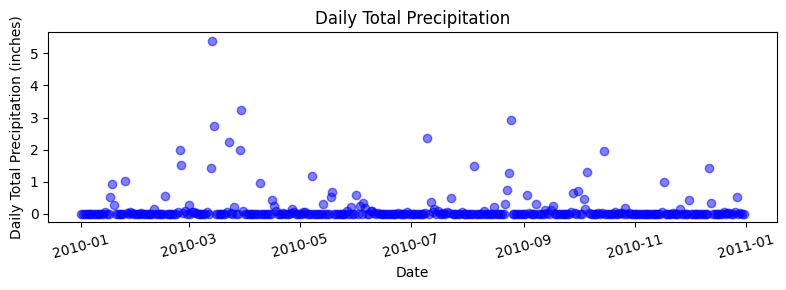

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the Excel file into a DataFrame
precip_data = pd.read_csv("/precip_data.txt", sep="\t")

# Convert "Date_time" column to datetime format
precip_data['Date_time'] = pd.to_datetime(precip_data['Date_time'])

# Set "Date_time" as the index
precip_data.set_index('Date_time', inplace=True)

# Resample to calculate daily totals
daily_totals = precip_data.resample('D').sum()
max_daily_total = daily_totals['P_inches'].max()
max_daily_total_day = daily_totals.loc[daily_totals['P_inches'].idxmax()].name.date()

# Calculate rolling 24-hour totals
rolling_24h_totals = precip_data['P_inches'].rolling('24H').sum()
max_24h_total = rolling_24h_totals.max()
max_24h_total_period_start = rolling_24h_totals.idxmax() - pd.Timedelta(days=1)
max_24h_total_period_end = rolling_24h_totals.idxmax()

# printing the results
print(f"Maximum Daily Total: {max_daily_total:.2f} inches")
print("Day with Maximum Precipitation:", max_daily_total_day)
print(f"Maximum 24-hour Total: {max_24h_total:.2f} inches")
print("\nPeriod with Maximum 24-hour Precipitation:")
print("Start:", max_24h_total_period_start)
print("End:", max_24h_total_period_end)

# Plot daily total precipitation against date
plt.figure(figsize=(8, 3))
plt.scatter(daily_totals.index, daily_totals['P_inches'], color='blue', marker='o', alpha=0.5)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Total Precipitation (inches)')
plt.title('Daily Total Precipitation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Show the plot
plt.tight_layout()
plt.show()
